In [99]:
import pandas as pd
import matplotlib.pyplot as plt
fileURL = './breastcancer.csv'
breast_cancer_db = pd.read_csv(fileURL)
breast_cancer_mean_db = breast_cancer_db.ix[:,1:12]

In [61]:
breast_cancer_mean_db[:3]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999


In [2]:
breast_cancer_mean_db.loc[(breast_cancer_mean_db['diagnosis'] == 'B'),'diagnosis'] = 0
breast_cancer_mean_db.loc[(breast_cancer_mean_db['diagnosis'] == 'M'),'diagnosis'] = 1
breast_cancer_mean_db['diagnosis'] = pd.to_numeric(breast_cancer_mean_db['diagnosis'])
breast_cancer_mean_db.rename(columns = {'concave points_mean':'concave_points_mean'}, inplace = True)

In [3]:
def get_X_y(feature_cols, target):
    X = breast_cancer_mean_db[feature_cols]
    y = breast_cancer_mean_db[target]
    return X, y

In [83]:
feature_cols = ['texture_mean', 'perimeter_mean', 'smoothness_mean',
               'compactness_mean', 'concave_points_mean']
target = 'diagnosis'
X, y = get_X_y(feature_cols, target)

In [62]:
X[:3]

,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,concave_points_mean
0,10.38,122.8,0.11840,0.27760,0.14710
1,17.77,132.9,0.08474,0.07864,0.07017
2,21.25,130.0,0.10960,0.15990,0.12790


In [63]:
y[:3]

0    1
1    1
2    1
Name: diagnosis, dtype: int64

In [5]:
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()

In [6]:
from sklearn.linear_model import LogisticRegression
lrg_clf = LogisticRegression(C=10, fit_intercept=True, tol=0.0001, class_weight='balanced')

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=10, weights='uniform')

In [8]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(criterion = "entropy", min_samples_split=4, 
                                     min_samples_leaf=2)

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(criterion = "gini", n_estimators=5)

In [10]:
from sklearn.cross_validation import cross_val_score

def model_and_validate(clf):
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy') 
    return scores.mean()

//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
print (model_and_validate(gnb_clf))

0.921070996457


In [14]:
print (model_and_validate(lrg_clf))

0.912234249417


print (model_and_validate(dt_clf))

In [16]:
print (model_and_validate(knn_clf))

0.891178376977


In [17]:
print (model_and_validate(rf_clf))

0.915962319592


In [18]:
from mlxtend.classifier import StackingClassifier

stk_clf = StackingClassifier(classifiers=[rf_clf, lrg_clf], meta_classifier=lrg_clf)

In [20]:
print (model_and_validate(stk_clf))

0.920825771325


ploting precision and recall curve

In [84]:
# Split into training and test
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,random_state=1)

In [85]:
y_train[:3]

138    1
51     0
437    0
Name: diagnosis, dtype: int64

In [95]:
y_test[:3]

421    0
47     1
292    0
Name: diagnosis, dtype: int64

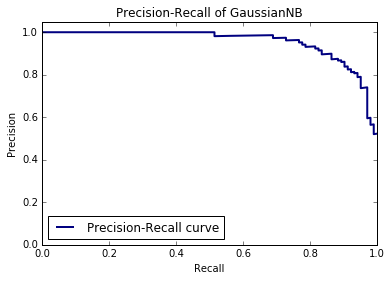

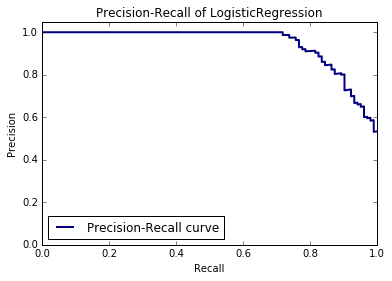

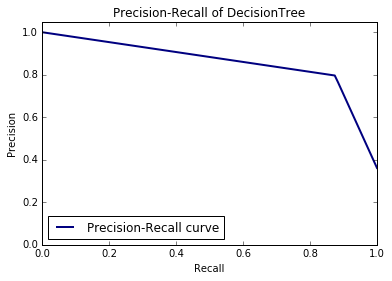

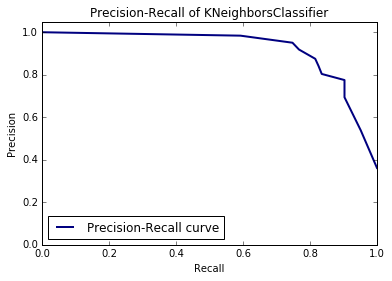

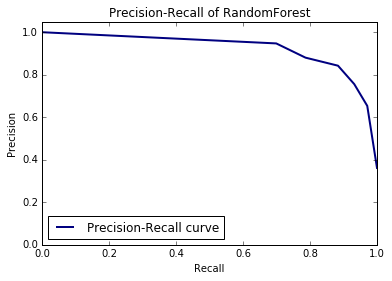

In [109]:
from itertools import cycle
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])
for clf, label in zip([gnb_clf, lrg_clf, dt_clf,knn_clf, rf_clf], 
                      ['GaussianNB', 
                       'LogisticRegression', 
                       'DecisionTree',
                       'KNeighborsClassifier',
                       'RandomForest']):
    y_scores = clf.fit(X_train, y_train).predict_proba(X_test)[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
    # Plot Precision-Recall curve
    plt.clf()
    plt.plot(recall, precision, lw=2, color='navy',
             label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall of '+label)
    plt.legend(loc="lower left")
    plt.show()